<a href="https://colab.research.google.com/github/CarolineWitts/hello-word/blob/main/Processamento_de_Linguagem_Natural_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import bs4 as bs
import urllib.request
import nltk
import spacy

# Marcação POS, lematização estemização

In [ ]:
!python3 -m spacy download pt

     |████████████████████████████████| 21.2 MB 1.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


#Marcação POS

In [ ]:
pln = spacy.load('pt')
pln 

In [ ]:
documento = pln('o rato roeu a roupa do rei de roma')

In [ ]:
for token in documento:
  print(token.text, token.pos_)

o DET
rato NOUN
roeu VERB
a DET
roupa NOUN
do ADP
rei NOUN
de ADP
roma PROPN


lematização e estemização

In [ ]:
for token in documento:
  print(token.text, token.lemma_)

o o
rato ratar
roeu roer
a o
roupa roupar
do do
rei rei
de de
roma roma


In [ ]:
doc = pln('encontrei encontraram encontraram encontrarão encontrariam cursando curso cursei')
[token.lemma_ for token in doc]

['encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'encontrar',
 'cursar',
 'cursar',
 'cursar']

In [ ]:
import nltk 
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [ ]:
stemmer = nltk.stem.RSLPStemmer()
stemmer.stem('aprender')

'aprend'

In [ ]:
for token in documento:
  print(token.text, token.lemma_, stemmer.stem(token.text))


o o o
rato ratar rat
roeu roer roeu
a o a
roupa roupar roup
do do do
rei rei rei
de de de
roma roma rom


# Carregamento da base de dados

In [ ]:
dados = urllib.request.urlopen('https://pt.wikipedia.org/wiki/Medita%C3%A7%C3%A3o')

In [ ]:
dados = dados.read()
dados

b'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Medita\xc3\xa7\xc3\xa3o \xe2\x80\x93 Wikip\xc3\xa9dia, a enciclop\xc3\xa9dia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","mar\xc3\xa7o","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"c9901955-76df-4b9d-9629-ee651a4ab7b9","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Medita\xc3\xa7\xc3\xa3o","wgTitle":"Medita\xc3\xa7\xc3\xa3o","wgCurRevisionId":61923438,"wgRevisionId":61923438,"wgArticleId":5648,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!P\xc3\xa1ginas com erros CS1: datas","!Predefini\xc3\xa7\xc3\x

In [ ]:
dados_html = bs.BeautifulSoup(dados, 'lxml')
dados_html

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="pt">
<head>
<meta charset="utf-8"/>
<title>Meditação – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"c9901955-76df-4b9d-9629-ee651a4ab7b9","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Meditação","wgTitle":"Meditação","wgCurRevisionId":61923438,"wgRevisionId":61923438,"wgArticleId":5648,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!Páginas com erros CS1: datas","!Predefinição Webarchive wayback links","!Avisos na predefinição Webarchive","!Páginas com referências sem URL e com aces

In [ ]:
paragrafos = dados_html.find_all('p')

In [ ]:
len(paragrafos)

17

In [ ]:
paragrafos[0].text

'\n\t\tPáginas para editores conectados saiba mais\n'

In [ ]:
conteudo = ''
for p in paragrafos:
  conteudo += p.text

In [ ]:
conteudo

'\n\t\tPáginas para editores conectados saiba mais\n\nA meditação pode ser definida como uma prática na qual o indivíduo utiliza técnicas para focar sua mente num objeto, pensamento ou atividade em particular, visando alcançar um estado de clareza mental e emocional.[1][2] Sua origem é muito antiga, remontando as tradições orientais, especialmente a ioga[3], mas o termo também se refere a práticas adotadas por alguns caminhos espirituais ou religiões, como o budismo e cristianismo, entre outras.[4] Textos orientais consideram a meditação como instrumento que leva em direção à libertação.[5]O termo em páli utilizado para referir-se a meditação é bhavana, que significa "cultivo".[6] O termo meditação foi utilizado como palavra para traduzir práticas espirituais orientais, referidas pelo termo dhyana no budismo e hinduísmo.[7][8] Estudiosos notaram que o termo "meditação" no uso contemporâneo é paralelo ao significado do termo "contemplação" no cristianismo.[9]\nOs Vedas hinduístas estão 

In [ ]:
conteudo = conteudo.lower()
conteudo

'\n\t\tpáginas para editores conectados saiba mais\n\na meditação pode ser definida como uma prática na qual o indivíduo utiliza técnicas para focar sua mente num objeto, pensamento ou atividade em particular, visando alcançar um estado de clareza mental e emocional.[1][2] sua origem é muito antiga, remontando as tradições orientais, especialmente a ioga[3], mas o termo também se refere a práticas adotadas por alguns caminhos espirituais ou religiões, como o budismo e cristianismo, entre outras.[4] textos orientais consideram a meditação como instrumento que leva em direção à libertação.[5]o termo em páli utilizado para referir-se a meditação é bhavana, que significa "cultivo".[6] o termo meditação foi utilizado como palavra para traduzir práticas espirituais orientais, referidas pelo termo dhyana no budismo e hinduísmo.[7][8] estudiosos notaram que o termo "meditação" no uso contemporâneo é paralelo ao significado do termo "contemplação" no cristianismo.[9]\nos vedas hinduístas estão 

#Buscas em textos com spaCy

In [ ]:
pln = spacy.load('pt')
pln

In [ ]:
string = 'meditação'
token_pesquisa = pln(string)

In [ ]:
pln.vocab

In [ ]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(pln.vocab)
matcher.add ('SEARCH', None, token_pesquisa)

In [ ]:
doc = pln(conteudo)
matches = matcher(doc)
matches

[(8661325627334373315, 9, 10),
 (8661325627334373315, 90, 91),
 (8661325627334373315, 106, 107),
 (8661325627334373315, 117, 118),
 (8661325627334373315, 143, 144),
 (8661325627334373315, 172, 173),
 (8661325627334373315, 212, 213),
 (8661325627334373315, 255, 256),
 (8661325627334373315, 305, 306),
 (8661325627334373315, 353, 354),
 (8661325627334373315, 385, 386),
 (8661325627334373315, 445, 446),
 (8661325627334373315, 483, 484),
 (8661325627334373315, 494, 495),
 (8661325627334373315, 533, 534),
 (8661325627334373315, 567, 568),
 (8661325627334373315, 597, 598),
 (8661325627334373315, 609, 610),
 (8661325627334373315, 627, 628),
 (8661325627334373315, 664, 665),
 (8661325627334373315, 677, 678),
 (8661325627334373315, 681, 682),
 (8661325627334373315, 734, 735),
 (8661325627334373315, 745, 746),
 (8661325627334373315, 781, 782),
 (8661325627334373315, 821, 822),
 (8661325627334373315, 859, 860),
 (8661325627334373315, 971, 972),
 (8661325627334373315, 1017, 1018),
 (866132562733437

In [ ]:
doc [3044:3045], doc[3044-5:3045+5]

(, )

In [ ]:
matches[0], matches[0][1], matches[0][2]

((8661325627334373315, 9, 10), 9, 10)

In [ ]:
from IPython.core.display import HTML

In [ ]:
numero_palavras = 50

In [ ]:
doc = pln(conteudo)
matches = matcher(doc)
texto = ''
display (HTML(f'<h1>{string.upper()}</h1>'))
display (HTML(f"""<p><strong>Resultados encontrados</strong>{len(matches)}</p>"""))
for i in matches:
  inicio =i[1] - numero_palavras
  if inicio < 0:
    inicio = 0
  texto += str(doc[inicio:i[2] + numero_palavras]).replace(string, f"<mark>{string}</mark>")
  texto += "<br /><br />"
display(HTML(f"""... {texto} ..."""))

# Extração de entidades nomeadas

In [ ]:
for entidade in doc.ents:
  print(entidade.text, entidade.label_)

ioga[3 ORG
china LOC
nepal LOC
índia LOC
cristo PER
plotino PER
império romano LOC
fílon de alexandria PER
xii MISC
respiração.[11 MISC
grécia LOC
guigo ii PER
xii MISC
inácio de loyola PER
teresa de ávila.[15][16][17][18]a definição de meditação PER
contraditórias.[23 MISC
nirvana ORG
libertação.[5 ORG
lótus PER
seiza PER
meio-lótus PER
etc.[21 ORG


In [ ]:
from spacy import displacy
displacy.render(doc, style = 'ent', jupyter = True)

#Nuvem de palavras com Python

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
print(STOP_WORDS)

{'vem', 'quarta', 'lá', 'vossas', 'favor', 'dão', 'dá', 'caminho', 'vêm', 'nossos', 'tentei', 'vocês', 'porquê', 'vais', 'dentro', 'temos', 'sem', 'ontem', 'vez', 'lugar', 'foste', 'ir', 'oitavo', 'meus', 'quinze', 'pela', 'fora', 'primeira', 'tarde', 'podia', 'menos', 'oitava', 'também', 'partir', 'você', 'des', 'teve', 'pelas', 'disso', 'momento', 'quando', 'têm', 'coisa', 'apenas', 'estive', 'enquanto', 'além', 'quem', 'certeza', 'ali', 'grupo', 'nove', 'só', 'contudo', 'tanto', 'ter', 'dezoito', 'lado', 'sexta', 'todos', 'já', 'estivemos', 'fomos', 'nenhuma', 'com', 'porquanto', 'baixo', 'vários', 'cá', 'breve', 'estar', 'fazes', 'tuas', 'todo', 'nosso', 'aí', 'somente', 'posso', 'quê', 'dar', 'conselho', 'mais', 'vai', 'tiveram', 'nível', 'diz', 'tempo', 'povo', 'tentaram', 'deste', 'apoio', 'algumas', 'vos', 'corrente', 'novo', 'que', 'desde', 'doze', 'ambos', 'nas', 'usar', 'fazeis', 'outras', 'seis', 'nós', 'podem', 'porém', 'sob', 'aquele', 'essas', 'tão', 'quero', 'tiveste', 

In [ ]:
len(STOP_WORDS)

413

In [ ]:
pln.vocab['usa'].is_stop

True

In [ ]:
doc = pln(conteudo)
lista_token = []
for token in doc:
  lista_token.append(token.text)
print(lista_token)

['\n\t\t', 'páginas', 'para', 'editores', 'conectados', 'saiba', 'mais', '\n\n', 'a', 'meditação', 'pode', 'ser', 'definida', 'como', 'uma', 'prática', 'na', 'qual', 'o', 'indivíduo', 'utiliza', 'técnicas', 'para', 'focar', 'sua', 'mente', 'num', 'objeto', ',', 'pensamento', 'ou', 'atividade', 'em', 'particular', ',', 'visando', 'alcançar', 'um', 'estado', 'de', 'clareza', 'mental', 'e', 'emocional.[1][2', ']', 'sua', 'origem', 'é', 'muito', 'antiga', ',', 'remontando', 'as', 'tradições', 'orientais', ',', 'especialmente', 'a', 'ioga[3', ']', ',', 'mas', 'o', 'termo', 'também', 'se', 'refere', 'a', 'práticas', 'adotadas', 'por', 'alguns', 'caminhos', 'espirituais', 'ou', 'religiões', ',', 'como', 'o', 'budismo', 'e', 'cristianismo', ',', 'entre', 'outras.[4', ']', 'textos', 'orientais', 'consideram', 'a', 'meditação', 'como', 'instrumento', 'que', 'leva', 'em', 'direção', 'à', 'libertação.[5]o', 'termo', 'em', 'páli', 'utilizado', 'para', 'referir-se', 'a', 'meditação', 'é', 'bhavana',

In [ ]:
len(lista_token)

1099

In [ ]:
sem_stop = []
for palavra in lista_token:
  if pln.vocab[palavra].is_stop == False:
    sem_stop.append(palavra)

In [ ]:
len(sem_stop)

739

In [ ]:
from matplotlib.colors import ListedColormap
color_map = ListedColormap(['orange', 'green', 'red', 'magenta'])

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(background_color= 'white', max_words = 100, colormap = color_map)

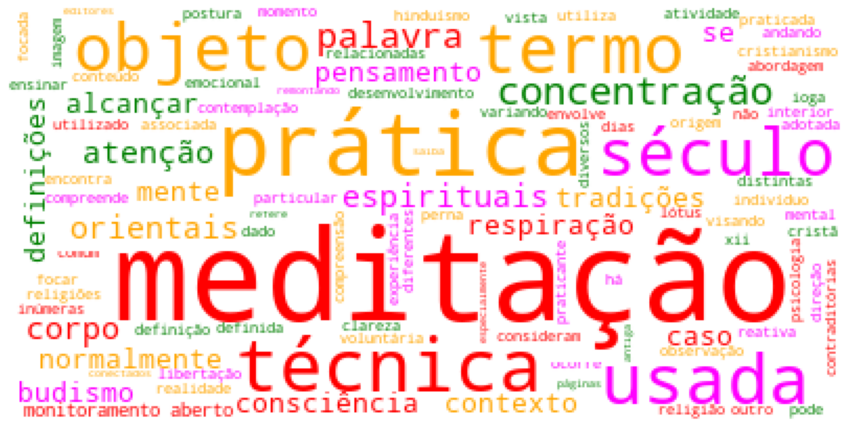

In [ ]:
import matplotlib.pyplot as plt
cloud = cloud.generate(' '.join(sem_stop))
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# Classificação de sentimentos com spaCy 

In [1]:
!pip install spacy==2.2.3

     |████████████████████████████████| 10.4 MB 5.1 MB/s 
     |████████████████████████████████| 2.2 MB 40.5 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [2]:
import spacy
spacy.__version__

'2.2.3'

In [3]:
!python3 -m spacy download pt

     |████████████████████████████████| 21.2 MB 1.3 MB/s 
  Created wheel for pt-core-news-sm: filename=pt_core_news_sm-2.2.5-py3-none-any.whl size=21186282 sha256=45bfbc42b91f033951a02e1a4c11fa106160add587a9458f30d193de9e01f4c4
  Stored in directory: /tmp/pip-ephem-wheel-cache-etdkl0s6/wheels/c3/f9/0c/5c014a36941a00f5df5fc0756cb961d7c457a978e697a6ce3b
Successfully built pt-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [4]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

In [5]:
base_dados = pd.read_csv('/content/drive/MyDrive/machine learn/base_treinamento.txt', encoding = 'utf-8')

In [6]:
base_dados.shape

(198, 2)

In [7]:
base_dados.head()

,texto,emocao
0,a criança sorriu ao ver seu bicho de pelúcia p...,alegria
1,este trabalho é agradável,alegria
2,gosto de ficar no seu aconchego,alegria
3,fiz a adesão ao curso hoje,alegria
4,eu sou admirada por muitos,alegria


In [8]:
base_dados.tail()

,texto,emocao
193,estou chocado e amedrontado com este assassina...,medo
194,é preciso afugenta com ímpeto este medo do inf...,medo
195,políticos usam suas forças para afugentar e am...,medo
196,o objetivo disso e apenas me amedrontar mais,medo
197,isso me apavora,medo


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


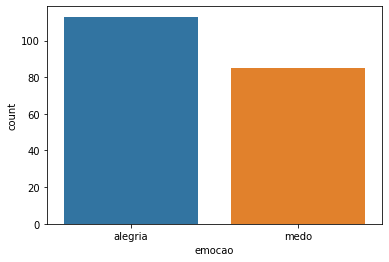

In [9]:
sns.countplot(base_dados['emocao'], label = 'Contagem')

In [10]:
pontuacoes = string.punctuation
pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [12]:
len(stop_words)

413

In [13]:
pln = spacy.load('pt')

In [14]:
pln

In [15]:
def preprocessamento(texto):
  texto = texto.lower()
  documento = pln(texto)

  lista = []

  for token in documento:
    #lista.append(token.text)
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
  
  return lista



In [16]:
teste = preprocessamento('nao quero escrever, 1 2 3 o que o professor colocou no video')
teste

'nao querer escrever o o professor colocar o video'

In [17]:
base_dados.head(10)

,texto,emocao
0,a criança sorriu ao ver seu bicho de pelúcia p...,alegria
1,este trabalho é agradável,alegria
2,gosto de ficar no seu aconchego,alegria
3,fiz a adesão ao curso hoje,alegria
4,eu sou admirada por muitos,alegria
5,adoro como você,alegria
6,adoro seu cabelo macio,alegria
7,adoro a cor dos seus olhos,alegria
8,somo tão amáveis um com o outro,alegria
9,sinto uma grande afeição por ele,alegria


In [18]:
base_dados['texto'] = base_dados['texto'].apply(preprocessamento)

In [19]:
base_dados.head(10)

,texto,emocao
0,o criança sorrir o o bichar pelúcia pendurar o...,alegria
1,trabalhar agradável,alegria
2,gostar ficar o aconchegar,alegria
3,o adesão o o cursar hoje,alegria
4,admirar,alegria
5,adorar comer,alegria
6,adorar cabelar maciar,alegria
7,adorar o cor olho,alegria
8,somar amável o outro,alegria
9,sentir umar afeição,alegria


#tratamento da classe

In [20]:
exemplo_base_dados = [['este lugar é agradavel', {'ALEGRIA':True, 'MEDO':False}],
                     ['este lugar continua assustador', {'ALEGRIA':False, 'MEDO':True}]]

In [21]:
type(exemplo_base_dados)

list

In [22]:
exemplo_base_dados[0]

['este lugar é agradavel', {'ALEGRIA': True, 'MEDO': False}]

In [23]:
exemplo_base_dados[0][0]

'este lugar é agradavel'

In [24]:
exemplo_base_dados[0][1]

{'ALEGRIA': True, 'MEDO': False}

In [25]:
type(exemplo_base_dados[0][1])

dict

In [26]:
base_dados_final = []

for texto, emocao in zip(base_dados['texto'], base_dados['emocao']):
  #print(texto, emocao)
  if emocao ==  'alegria':
    dic = ({'ALEGRIA':True, 'MEDO':False})
  elif emocao == 'medo':
    dic = ({'ALEGRIA':False, 'MEDO':True})

    base_dados_final.append([texto, dic.copy()])

In [27]:
base_dados_final[0]

['o batata assassino sepultar o mandioca ensanguentar',
 {'ALEGRIA': False, 'MEDO': True}]

In [28]:
base_dados_final[0][0]

'o batata assassino sepultar o mandioca ensanguentar'

In [29]:
base_dados_final[0][1]

{'ALEGRIA': False, 'MEDO': True}

In [30]:
type(base_dados_final[0][1])

dict

In [31]:
base_dados_final

[['o batata assassino sepultar o mandioca ensanguentar',
  {'ALEGRIA': False, 'MEDO': True}],
 ['implorar matar', {'ALEGRIA': False, 'MEDO': True}],
 ['perigoso', {'ALEGRIA': False, 'MEDO': True}],
 ['segurar', {'ALEGRIA': False, 'MEDO': True}],
 ['correr pra', {'ALEGRIA': False, 'MEDO': True}],
 ['socorrer querer roubar o doce', {'ALEGRIA': False, 'MEDO': True}],
 ['caro perseguir', {'ALEGRIA': False, 'MEDO': True}],
 ['entrar perigoso', {'ALEGRIA': False, 'MEDO': True}],
 ['continuar assustador', {'ALEGRIA': False, 'MEDO': True}],
 ['o selva animar perigoso', {'ALEGRIA': False, 'MEDO': True}],
 ['avançar cautela', {'ALEGRIA': False, 'MEDO': True}],
 ['silencioso cuidar', {'ALEGRIA': False, 'MEDO': True}],
 ['deixe-me viver', {'ALEGRIA': False, 'MEDO': True}],
 ['ficar mesada tirar noto', {'ALEGRIA': False, 'MEDO': True}],
 ['parecer olho o vigiar', {'ALEGRIA': False, 'MEDO': True}],
 ['o sentença juiz negativo', {'ALEGRIA': False, 'MEDO': True}],
 ['missão arriscar', {'ALEGRIA': Fals

Classificação de sentimentos 

In [32]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe('textcat')
categorias.add_label('ALEGRIA')
categorias.add_label('MEDO')
modelo.add_pipe(categorias)
historico = []



In [33]:
modelo.begin_training()
for epoca in range(1000):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 30):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
  if epoca % 100 == 0:
     print(losses)
     historico.append(losses)




{'textcat': 0.002444839687086642}
{'textcat': 9.378058607456552e-10}
{'textcat': 6.335763025333563e-10}
{'textcat': 4.924141094875267e-10}
{'textcat': 3.362513531501854e-10}
{'textcat': 3.0922440996672407e-10}
{'textcat': 2.40646665788935e-10}
{'textcat': 2.0291739816213905e-10}
{'textcat': 1.765879074910881e-10}
{'textcat': 1.67022857350263e-10}


In [34]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [35]:
historico_loss = np.array(historico_loss)
historico_loss

array([2.44483969e-03, 9.37805861e-10, 6.33576303e-10, 4.92414109e-10,
       3.36251353e-10, 3.09224410e-10, 2.40646666e-10, 2.02917398e-10,
       1.76587907e-10, 1.67022857e-10])

Text(0, 0.5, 'Erro')

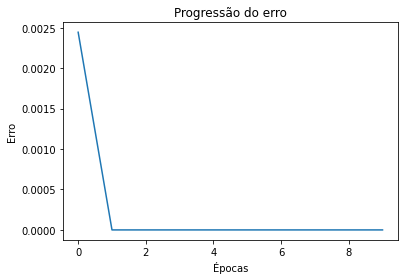

In [36]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('Progressão do erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')


In [37]:
modelo.to_disk('modelo')

In [38]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

In [39]:
texto_positivo = "a criança sorriu ao ver seu bicho de pelúcia pendurado no varal"

In [40]:
texto_positivo = preprocessamento(texto_positivo)
texto_positivo

'o criança sorrir o o bichar pelúcia pendurar o varal'

In [41]:
previsao = modelo_carregado(texto_positivo)
previsao

o criança sorrir o o bichar pelúcia pendurar o varal

In [42]:
previsao.cats

{'ALEGRIA': 7.898084732005373e-05, 'MEDO': 0.9999545812606812}

In [43]:
texto_negativo = 'a batata assassina sepultou a mandioca ainda ensanguentada'
previsao = modelo_carregado(preprocessamento(texto_negativo))

In [44]:
previsao.cats

{'ALEGRIA': 4.539786823443137e-05, 'MEDO': 0.9995504021644592}

In [45]:
previsoes = []
for texto in base_dados['texto']:
  #print(texto)
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [46]:
previsoes

[{'ALEGRIA': 7.898084732005373e-05, 'MEDO': 0.9999545812606812},
 {'ALEGRIA': 8.847452409099787e-05, 'MEDO': 0.9999545812606812},
 {'ALEGRIA': 4.539786823443137e-05, 'MEDO': 0.9999545812606812},
 {'ALEGRIA': 0.0005195180419832468, 'MEDO': 0.9999545812606812},
 {'ALEGRIA': 6.89605949446559e-05, 'MEDO': 0.9999545812606812},
 {'ALEGRIA': 0.0003284348640590906, 'MEDO': 0.9999545812606812},
 {'ALEGRIA': 6.27991248620674e-05, 'MEDO': 0.9999545812606812},
 {'ALEGRIA': 0.0003455189289525151, 'MEDO': 0.9999545812606812},
 {'ALEGRIA': 4.539786823443137e-05, 'MEDO': 0.9999545812606812},
 {'ALEGRIA': 7.459868356818333e-05, 'MEDO': 0.9999545812606812},
 {'ALEGRIA': 0.0001120034939958714, 'MEDO': 0.9999545812606812},
 {'ALEGRIA': 6.677195779047906e-05, 'MEDO': 0.9999545812606812},
 {'ALEGRIA': 4.539786823443137e-05, 'MEDO': 0.9999545812606812},
 {'ALEGRIA': 4.539786823443137e-05, 'MEDO': 0.9999545812606812},
 {'ALEGRIA': 0.0006506397621706128, 'MEDO': 0.9999545812606812},
 {'ALEGRIA': 0.000115685572

In [47]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsoes_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)

In [48]:
previsoes_final

array(['medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
       'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo', 'medo',
      

In [49]:
respostas_reais = base_dados['emocao'].values
respostas_reais

array(['alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 'alegria', 'alegria',
       'alegria', 'alegria', 'alegria', 'alegria', 

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.4292929292929293

In [51]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm 

array([[  0, 113],
       [  0,  85]])

# avaliação na base de teste

In [52]:
base_dados_teste = pd.read_csv('/content/drive/MyDrive/machine learn/base_teste.txt', encoding = 'utf-8')
base_dados_teste

,texto,emocao
0,não precisei pagar o ingresso,alegria
1,se eu ajeitar tudo fica bem,alegria
2,minha fortuna ultrapassará a sua,alegria
3,sou muito afortunado,alegria
4,é benéfico para todos esta nova medida,alegria
...,...,...
79,fui notificado e estou com medo de perder a gu...,medo
80,estou angustiada com meus filhos na rua,medo
81,e abominável o que fazem com os animais,medo
82,foi terrível o tigre quase o matou,medo


In [53]:
base_dados_teste['texto'] = base_dados_teste['texto'].apply(preprocessamento)
base_dados_teste.head

<bound method NDFrame.head of                                       texto   emocao
0                precisar pagar o ingressar  alegria
1                             ajeitar ficar  alegria
2                fortuna ultrapassar o suar  alegria
3                                 afortunar  alegria
4                      benéfico parir medir  alegria
..                                      ...      ...
79  notificar e medo perder o guardar filho     medo
80                   angustiar filho o ruir     medo
81                  e abominável o o animar     medo
82           terrível o tigre quase o matar     medo
83                          advertir sobrar     medo

[84 rows x 2 columns]>

In [54]:
previsoes = []
for texto in base_dados_teste['texto']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [55]:
previsoes_final = []
for previsao in previsoes:
  if previsao['ALEGRIA'] > previsao['MEDO']:
    previsao_final.append('alegria')
  else:
    previsoes_final.append('medo')

previsoes_final = np.array(previsoes_final)


In [56]:
respostas_reais = base_dados_teste['emocao'].values

In [57]:
accuracy_score(respostas_reais, previsoes_final)

0.42857142857142855

In [58]:
confusion_matrix(respostas_reais, previsoes_final)
cm

array([[  0, 113],
       [  0,  85]])

base de dados do Twitter em português

# base twitter

In [59]:
!pip install spacy==2.2.3

In [60]:
import spacy
spacy.__version__

'2.2.3'

In [61]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np
import re

In [62]:
!python3 -m spacy download pt

     |████████████████████████████████| 21.2 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [63]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [64]:
base_treinamento = pd.read_csv('/content/drive/MyDrive/machine learn/Train50.csv', delimiter=';')

In [65]:
base_treinamento

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)
...,...,...,...,...,...
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(


In [66]:
len(base_treinamento)

50000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


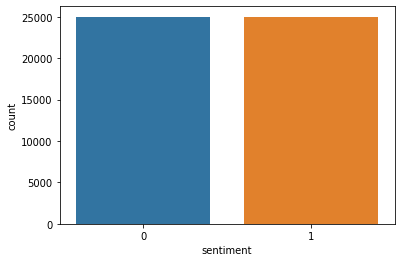

In [67]:
sns.countplot(base_treinamento['sentiment'], label = 'Contagem')

In [68]:
base_treinamento.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [69]:
base_treinamento.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


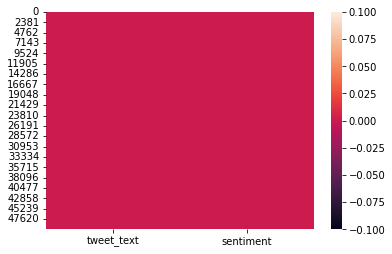

In [70]:
sns.heatmap(pd.isnull(base_treinamento));

In [71]:
base_teste = pd.read_csv('/content/drive/MyDrive/machine learn/Test.csv', delimiter= ';')

In [72]:
base_teste.head()

,id,tweet_text,tweet_date,sentiment,query_used
0,1029536486021099522,@Gazo1a Nossa! Muito obrigada :),Wed Aug 15 01:13:20 +0000 2018,1,:)
1,1029536496368406528,@BerzGamer vai pa puta que te pariu :),Wed Aug 15 01:13:23 +0000 2018,1,:)
2,1029536531655131137,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,Wed Aug 15 01:13:31 +0000 2018,1,:)
3,1029536560117678081,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",Wed Aug 15 01:13:38 +0000 2018,1,:)
4,1029536605852377088,Estávamos em casa do Zé e eu estava a morrer d...,Wed Aug 15 01:13:49 +0000 2018,1,:)


In [73]:
base_teste.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace=True)

In [74]:
base_teste.head()

,tweet_text,sentiment
0,@Gazo1a Nossa! Muito obrigada :),1
1,@BerzGamer vai pa puta que te pariu :),1
2,QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira n...,1
3,"EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR ...",1
4,Estávamos em casa do Zé e eu estava a morrer d...,1


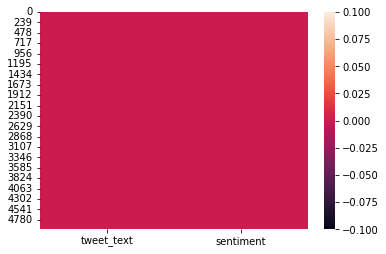

In [75]:
sns.heatmap(pd.isnull(base_teste));

In [76]:
pln = spacy.load('pt')
pln

In [77]:
stop_words = spacy.lang.pt.stop_words.STOP_WORDS

In [78]:
def preprocessamento(texto):
  # Letras minúsculas
  texto = texto.lower()

  # Nome do usuário
  texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)

  # URLs
  texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)

  # Espaços em branco
  texto = re.sub(r" +", ' ', texto)

  # Emoticons
  lista_emocoes = {':)': 'emocaopositiva',
                   ':d': 'emocaopositiva',
                   ':(': 'emocaonegativa'}
  for emocao in lista_emocoes:
    texto = texto.replace(emocao, lista_emocoes[emocao])

  # Lematização
  documento = pln(texto)

  lista = []
  for token in documento:
    lista.append(token.lemma_)
  
  # Stop words e pontuações
  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in string.punctuation]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])
  
  return lista

In [79]:
base_treinamento.head(30)

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1
5,@KingJokerLeto mas amiga eu to aqui ainda :),1
6,"@RivasJairo Bravo, Jairo!!! :)))",1
7,@inquilinasls @Spotify socorro ksoaksosks acho...,1
8,"@chimekarlla gosto muito de fazenda :) , mas m...",1
9,Amanha vou ver venom :D,1


In [80]:
base_treinamento['tweet_text'] = base_treinamento['tweet_text'].apply(preprocessamento)

In [81]:
base_treinamento.head()

,tweet_text,sentiment
0,o pessoa certo parir seriar o valer e azeved...,1
1,parir mim precisamente o contrário emocaopos...,1
2,video hoje ... pensar falar sobrar o meter csg...,1
3,aaaaaaaa amar polaroids expressar o quantum to...,1
4,valorizar o coração menino vc diferente o sorr...,1


In [82]:
base_teste['tweet_text'] = base_teste['tweet_text'].apply(preprocessamento)

In [83]:
base_teste.head(10)

,tweet_text,sentiment
0,obrigar emocaopositiva,1
1,pa puta parir emocaopositiva,1
2,querer desconto 14/08 ⭐ ⭐ ⭐ ⭐ ⭐ 🌐 conferir o l...,1
3,vcs ajudar galera pelar amor butera emocaoposi...,1
4,casar zé e o morrer sono chegar o casar e fica...,1
5,preciso emocaopositiva,1
6,acaso adorar beijo e abraço hahahahaha bue f...,1
7,solteiro s emocaopositiva,1
8,lindeza cortador kit mário coleção bia cravol ...,1
9,claro emocaopositiva,1


# tratamento da classe

In [84]:
exemplo_base_dados = [["este trabalho é agradável", {"POSITIVO":True, "NEGATIVO":False}],
                      ["este lugar continua é assustador", {"POSITIVO":True, "NEGATIVO":True}]]

In [85]:
base_dados_treinamento_final = []
for texto, emocao in zip(base_treinamento['tweet_text'], base_treinamento['sentiment']):
  if emocao == 1:
    dic = ({'POSITIVO':True, 'NEGATIVO':False})
  elif emocao == 0:
    dic = ({'POSITIVO':False, 'NEGATIVO':True})

  base_dados_treinamento_final.append([texto, dic.copy()])
  


In [86]:
len(base_dados_treinamento_final)

50000

In [87]:
base_dados_treinamento_final[10:15]

[['simplesmente o deixar chatear querer muitooo e iludir emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['o comedir umar rotina e perfeitamente parir consolidar o escola condução :p',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['amigar parecer apaixonar vc — recíproco emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['  gajar bacano aleijar esperar e o silvar feliz emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}],
 ['tou o video cabra bebé emocaopositiva',
  {'NEGATIVO': False, 'POSITIVO': True}]]

#criação classaficador

In [103]:
modelo = spacy.blank('pt')
categorias = modelo.create_pipe("textcat")
categorias.add_label("POSITIVO")
categorias.add_label("NEGATIVO")
modelo.add_pipe(categorias)
historico = []

In [98]:
modelo.begin_training()
for epoca in range(5):
  random.shuffle(base_dados_treinamento_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_treinamento_final, 512):
    textos = [modelo(texto) for texto, entities in batch]
    annotations = [{'cats': entities} for texto, entities in batch]
    modelo.update(textos, annotations, losses=losses)
    historico.append(losses)
  if epoca % 5 == 0:
    print(losses)

{}


In [104]:
historico_loss = []
for i in hisotrico:
  historico_loss.append(i.get('textcats'))

In [105]:
historico_loss = np.array(historico_loss)
historico_loss

array([], dtype=float64)

Text(0, 0.5, 'erros')

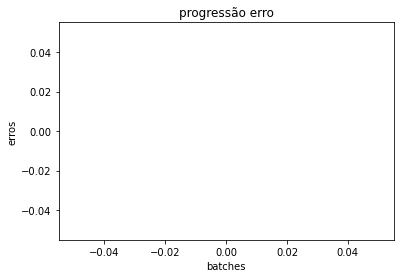

In [106]:
import matplotlib.pyplot as plt
plt.plot(historico_loss)
plt.title('progressão erro')
plt.xlabel('batches')
plt.ylabel('erros')


In [102]:
modelo.to_disk("modelo")


# teste com uma frase

#teste com uma frase

In [94]:
modelo_carregado = spacy.load('modelo')
modelo_carregado

#texto positivo

In [95]:
texto_positivo = base_teste['tweet_text'][21]
texto_positivo

'  ficar feliz q recíproco emocaopositiva'

In [95]:
previsao = modelo_carregado(texto_positivo)
previsao

In [107]:
previsao.cats

AttributeError: ignored

In [ ]:
texto_positivo = 'eu gosto muito de voce'
texto_positivo = preprocessamento(texto_positvo)
texto_positivo

In [ ]:
modelo_carregado(texto_positivo).cats

#testo negativo

In [ ]:
base_teste['tweet_text'][4000]

In [ ]:
texto_negativo = base_teste['tweet_text'][4000]
previsao = modelo_carregado(texto_negativo)
previsao_cats

#avaliação do modelo

In [ ]:
previsoes = []
for texto in base_teste['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['POSITIVO'] > previsao['NEGATIVO']:
    previsoes_final.append(1)
  else: 
    previsoes_final.append(0)

previsoes_final = no.array(previsoes_final)

In [ ]:
respostas_reais = base_teste['sentiment'].values